In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [7]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,vipul tatvam villa,sector 48,7.25,22377.0,3240.0,Plot area 360(33.45 sq.m.),4.0,4.0,3,2.0,NaN,Relatively New,NaN,360.0,NaN,1,1,1,1,0,2,103,810.000000
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,0.0,NaN,New Property,1760.0,NaN,NaN,0,0,0,0,1,0,35,586.666667
2,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,6.0,East,New Property,2132.0,NaN,NaN,0,1,0,0,0,1,168,710.666667
3,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.0,0,1,0,0,0,2,61,2499.777778
4,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3.0,3.0,2,9.0,East,Relatively New,NaN,1730.0,NaN,0,0,0,0,0,2,65,576.666667


In [9]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1684
built_up_area          1970
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

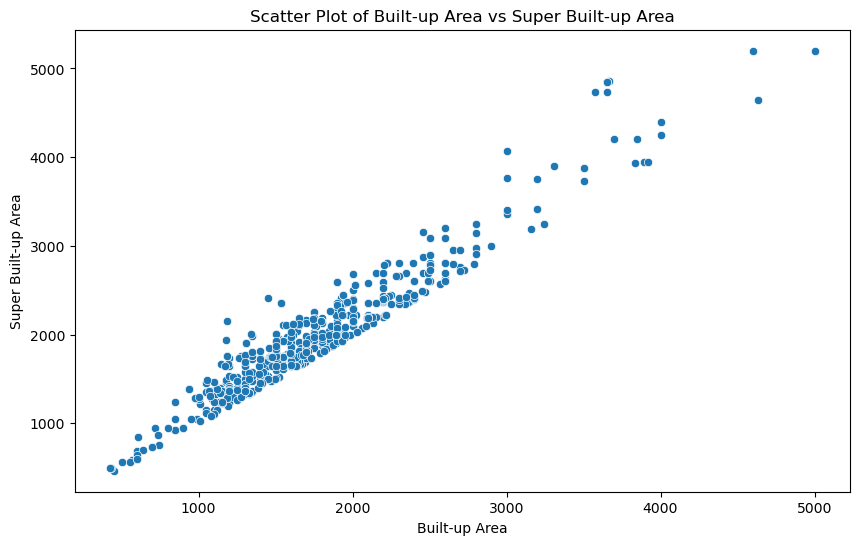

In [13]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='built_up_area', y='super_built_up_area', data=df)
plt.title('Scatter Plot of Built-up Area vs Super Built-up Area')
plt.xlabel('Built-up Area')
plt.ylabel('Super Built-up Area')
plt.show()


In [15]:
sns.scatterplot(df['built_up_area'],df['carpet_area'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

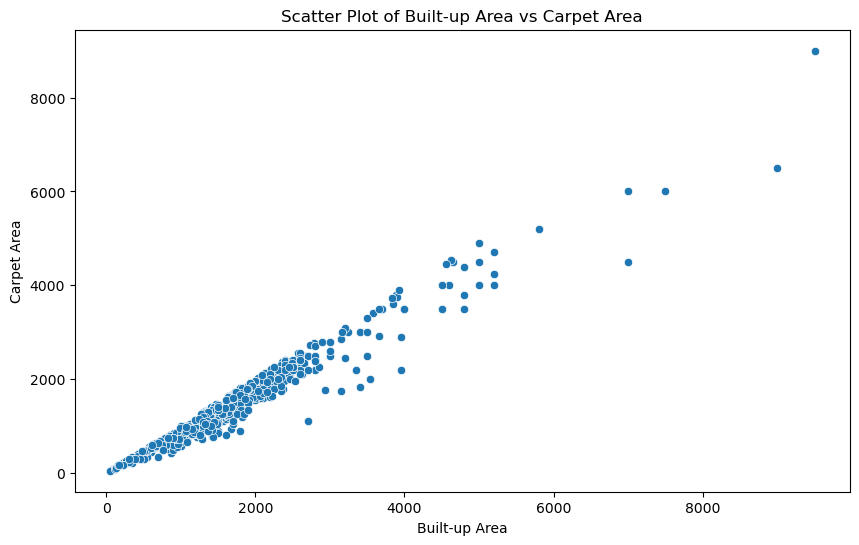

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='built_up_area', y='carpet_area', data=df)
plt.title('Scatter Plot of Built-up Area vs Carpet Area')
plt.xlabel('Built-up Area')
plt.ylabel('Carpet Area')
plt.show()

In [19]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [21]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]
all_present_df.shape

(530, 24)

In [23]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1063815789473685 0.900140056022409


In [25]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
31,flat,experion the heartsong,sector 108,1.30,8344.0,1558.0,Super Built up area 1758(163.32 sq.m.)Carpet a...,3.0,3.0,3+,7.0,South-West,Relatively New,1758.0,NaN,1558.0,1,0,0,0,0,0,150,519.333333
33,flat,sbtl caladium,sector 109,1.35,7181.0,1880.0,Super Built up area 1880(174.66 sq.m.)Carpet a...,3.0,2.0,3+,12.0,West,Relatively New,1880.0,NaN,1128.0,0,0,0,0,0,0,128,626.666667
37,flat,shree vardhman victoria,sector 70,1.55,7949.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,3.0,3,6.0,South-East,Relatively New,1950.0,NaN,1161.0,1,1,0,1,1,0,49,650.000000
48,flat,shree vardhman victoria,sector 70,1.80,9231.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,4.0,3,2.0,South-West,New Property,1950.0,NaN,1161.0,0,1,0,0,1,0,45,650.000000
52,flat,shree vardhman flora,sector 90,1.27,4951.0,2565.0,Super Built up area 2575(239.23 sq.m.)Carpet a...,4.0,5.0,2,9.0,North-East,New Property,2575.0,NaN,1950.0,1,1,0,0,0,0,83,641.250000


In [29]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_65014/1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_65014/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [31]:
df.update(sbc_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1684
built_up_area          1550
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [33]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,imperia the esfera,sector 37c,0.86,4886.0,1760.0,Super Built up area 1760(163.51 sq.m.),3.0,3.0,2,0.0,NaN,New Property,1760.0,NaN,NaN,0,0,0,0,1,0,35,586.666667
2,flat,dlf the ultima,sector 81,2.25,10553.0,2132.0,Super Built up area 2132(198.07 sq.m.),3.0,3.0,3+,6.0,East,New Property,2132.0,NaN,NaN,0,1,0,0,0,1,168,710.666667
10,flat,dlf express greens,manesar,1.20,6504.0,1845.0,Super Built up area 1845(171.41 sq.m.),3.0,4.0,2,5.0,East,Relatively New,1845.0,NaN,NaN,0,1,0,0,1,0,43,615.000000
12,flat,bestech park view sanskruti,sector 92,1.42,7760.0,1830.0,Super Built up area 1920(178.37 sq.m.),3.0,3.0,2,10.0,East,Relatively New,1920.0,NaN,NaN,0,0,0,0,0,0,117,610.000000
13,flat,bestech park view residency,sector 2,1.18,7540.0,1565.0,Super Built up area 1565(145.39 sq.m.),2.0,2.0,3,5.0,East,Old Property,1565.0,NaN,NaN,1,0,0,0,0,0,76,782.500000


In [35]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_65014/1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_65014/1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_

In [37]:
df.update(sb_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1684
built_up_area           677
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [39]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,house,independent,sector 11,1.80,8079.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8.0,5.0,2,1.0,South,Undefined,NaN,NaN,2228.0,0,0,0,0,0,0,0,278.5
14,flat,pyramid urban,sector 67a,0.62,11855.0,523.0,Carpet area: 523 (48.59 sq.m.),2.0,2.0,2,2.0,South,Relatively New,NaN,NaN,523.0,0,0,0,0,0,0,64,261.5
16,flat,sobha smriti apartments,sector 56,0.50,8333.0,600.0,Carpet area: 600 (55.74 sq.m.),1.0,1.0,2,3.0,NaN,Undefined,NaN,NaN,600.0,0,0,0,0,0,0,0,600.0
18,flat,trisara our homes 3,sohna road,0.35,5564.0,629.0,Carpet area: 629 (58.44 sq.m.),2.0,2.0,1,2.0,North,New Property,NaN,NaN,629.0,0,0,0,0,0,0,74,314.5
20,flat,pyramid urban,sector 67a,0.56,7932.0,706.0,Carpet area: 700 (65.03 sq.m.),2.0,2.0,2,0.0,North-East,Relatively New,NaN,NaN,700.0,0,0,0,0,1,0,49,353.0


In [41]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_65014/2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_65014/2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_

In [43]:
df.update(c_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1010
agePossession             0
super_built_up_area    1684
built_up_area             0
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [45]:
sns.scatterplot(df['built_up_area'],df['price'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

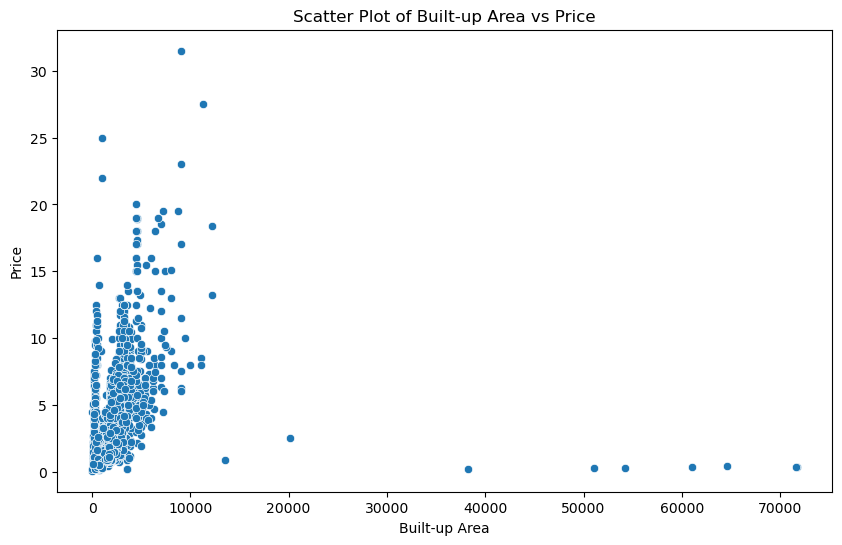

In [47]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='built_up_area', y='price', data=df)
plt.title('Scatter Plot of Built-up Area vs Price')
plt.xlabel('Built-up Area')
plt.ylabel('Price')
plt.show()

In [49]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]
anamoly_df.sample(5)

,price,area,built_up_area
878,7.10,2259.0,240.0
473,4.60,1460.0,1460.0
1281,3.35,2034.0,1841.0
2762,3.00,2047.0,1900.0
522,4.30,1467.0,1467.0


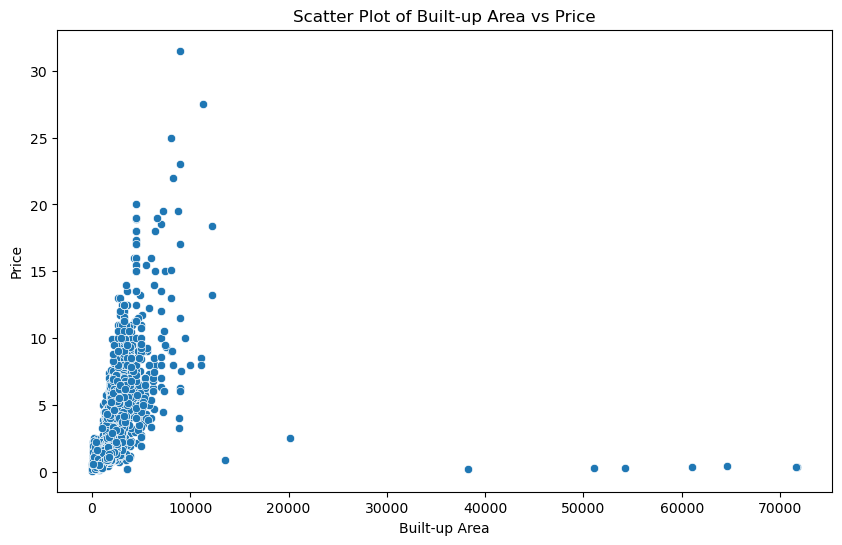

In [53]:
anamoly_df['built_up_area'] = anamoly_df['area']
df.update(anamoly_df)
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='built_up_area', y='price', data=df)
plt.title('Scatter Plot of Built-up Area vs Price')
plt.xlabel('Built-up Area')
plt.ylabel('Price')
plt.show()


In [55]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,vipul tatvam villa,sector 48,7.25,22377.0,4.0,4.0,3,2.0,NaN,Relatively New,3240.0,1,1,1,1,0,2,103
1,flat,imperia the esfera,sector 37c,0.86,4886.0,3.0,3.0,2,0.0,NaN,New Property,1593.0,0,0,0,0,1,0,35
2,flat,dlf the ultima,sector 81,2.25,10553.0,3.0,3.0,3+,6.0,East,New Property,1929.0,0,1,0,0,0,1,168
3,house,independent,sector 57,6.25,2778.0,9.0,9.0,3+,3.0,North-East,New Property,2660.0,0,1,0,0,0,2,61
4,flat,umang monsoon breeze,sector 78,0.95,5491.0,3.0,3.0,2,9.0,East,Relatively New,1730.0,0,0,0,0,0,2,65


In [57]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1010
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [61]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
421,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
719,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
842,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
929,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
1319,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,1,0
1390,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1392,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1516,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
1609,flat,experion heartsong,dwarka expressway,1.08,6150.0,3.0,3.0,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1707,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21


In [63]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [65]:
df['floorNum'].fillna(2.0,inplace=True)
df.isnull().sum()

/var/folders/7w/tfyt6rt124n73xvzq62ryd7m0000gn/T/ipykernel_65014/3049345725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1010
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [67]:
1011/df.shape[0]

0.2843881856540084

<Axes: ylabel='count'>

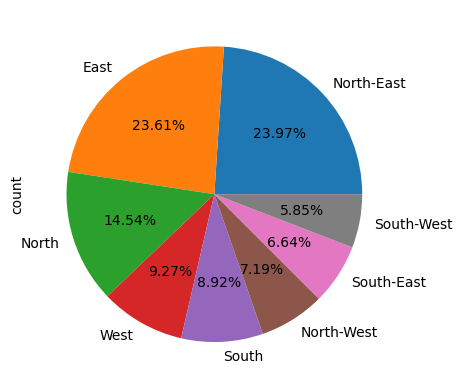

In [69]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [71]:
df.drop(columns=['facing'],inplace=True)
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3526,flat,the close south,sector 50,3.10,12445.0,3.0,4.0,3+,4.0,Moderately Old,2450.0,0,1,0,0,0,2,165
1055,flat,ats marigold,sector 89,1.70,9714.0,3.0,3.0,3+,8.0,Under Construction,1944.0,1,0,0,0,0,0,65
1266,flat,signature global the millennia,sector 37d,0.60,9231.0,2.0,2.0,3,7.0,New Property,625.0,0,0,0,0,0,0,35
2275,flat,pareena mi casa,sector 68,1.10,9016.0,2.0,2.0,3,13.0,New Property,1244.0,0,0,0,0,0,0,106
747,flat,ats triumph,sector 104,1.73,7555.0,3.0,4.0,3+,15.0,Relatively New,2072.0,0,1,0,0,0,0,159


In [73]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [75]:
df.drop(index=[2536],inplace=True)
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [77]:
df['agePossession'].value_counts()

agePossession
Relatively New        1606
New Property           556
Moderately Old         544
Old Property           292
Undefined              291
Under Construction     265
Name: count, dtype: int64

In [79]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
5,house,independent,sector 11,1.80,8079.0,8.0,5.0,2,1.0,Undefined,2476.0,0,0,0,0,0,0,0
8,flat,lord krishna,sector 12,2.70,8571.0,4.0,3.0,3,6.0,Undefined,3150.0,0,0,0,0,0,0,0
16,flat,sobha smriti apartments,sector 56,0.50,8333.0,1.0,1.0,2,3.0,Undefined,667.0,0,0,0,0,0,0,0
19,flat,raheja vedaanta,sector 108,1.50,5263.0,3.0,4.0,0,12.0,Undefined,2850.0,0,0,0,0,0,0,0
45,flat,tulip lemon,sector 69,0.60,11407.0,2.0,1.0,1,11.0,Undefined,584.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,flat,smart world orchard,sector 61,2.50,16139.0,3.0,3.0,1,1.0,Undefined,1549.0,0,0,0,0,0,0,61
3517,house,independent,sector 9,0.50,6083.0,3.0,2.0,1,1.0,Undefined,822.0,0,0,0,0,0,0,0
3532,house,independent,sector 14,4.60,20444.0,1.0,1.0,0,1.0,Undefined,2250.0,0,0,0,0,0,0,0
3542,flat,m3m golfestate,sector 65,6.15,18331.0,3.0,4.0,2,20.0,Undefined,3355.0,0,0,0,0,0,0,34


In [81]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [83]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)
df['agePossession'].value_counts()

agePossession
Relatively New        1730
New Property           584
Moderately Old         583
Old Property           325
Under Construction     279
Undefined               53
Name: count, dtype: int64

In [85]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']


In [87]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)
df['agePossession'].value_counts()

agePossession
Relatively New        1739
Moderately Old         590
New Property           585
Old Property           328
Under Construction     279
Undefined               33
Name: count, dtype: int64

In [89]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [91]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)
df['agePossession'].value_counts()

agePossession
Relatively New        1741
Moderately Old         621
New Property           585
Old Property           328
Under Construction     279
Name: count, dtype: int64

In [93]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [107]:
df[~df["society"].isnull()].sample(20)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3335,flat,tulip violet,sector 69,1.66,8409.0,4.0,4.0,1,12.0,Relatively New,1783.0,0,0,0,1,0,0,102
2407,house,bptp astaire gardens,sector 70a,1.18,8138.0,3.0,3.0,3+,2.0,Relatively New,1611.0,0,0,0,0,1,2,153
2045,flat,pareena laxmi apartments,sector 99a,0.32,5787.0,2.0,2.0,2,11.0,New Property,502.0,0,0,0,0,0,0,66
2989,flat,dlf new town heights,sector 90,1.55,6557.0,4.0,4.0,3+,1.0,Relatively New,2139.0,0,1,0,1,0,0,81
733,flat,central park resorts,sector 48,5.15,20901.0,3.0,3.0,3+,8.0,Moderately Old,2364.0,0,1,0,0,0,1,53
431,house,independent,sector 4,3.20,14222.0,3.0,3.0,2,2.0,Old Property,2250.0,0,0,0,0,0,0,13
2570,flat,gls avenue 51,sector 90,0.45,7614.0,2.0,2.0,1,10.0,New Property,646.0,1,0,0,0,0,2,20
1520,house,ashok vihar phase 3 gurgaon,sector 3 phase 3 extension,0.95,8879.0,4.0,3.0,2,1.0,Old Property,1070.0,0,0,0,0,0,0,8
1686,flat,ss the leaf,sector 85,1.30,7927.0,2.0,2.0,2,17.0,New Property,1484.0,0,0,0,0,0,0,90
2857,flat,m3m merlin,sector 67,2.80,13672.0,3.0,3.0,3,2.0,Relatively New,2048.0,0,0,1,0,0,1,174


In [109]:
df = df.dropna(subset=['society'])

In [111]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [113]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [115]:
df.shape

(3553, 18)